<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


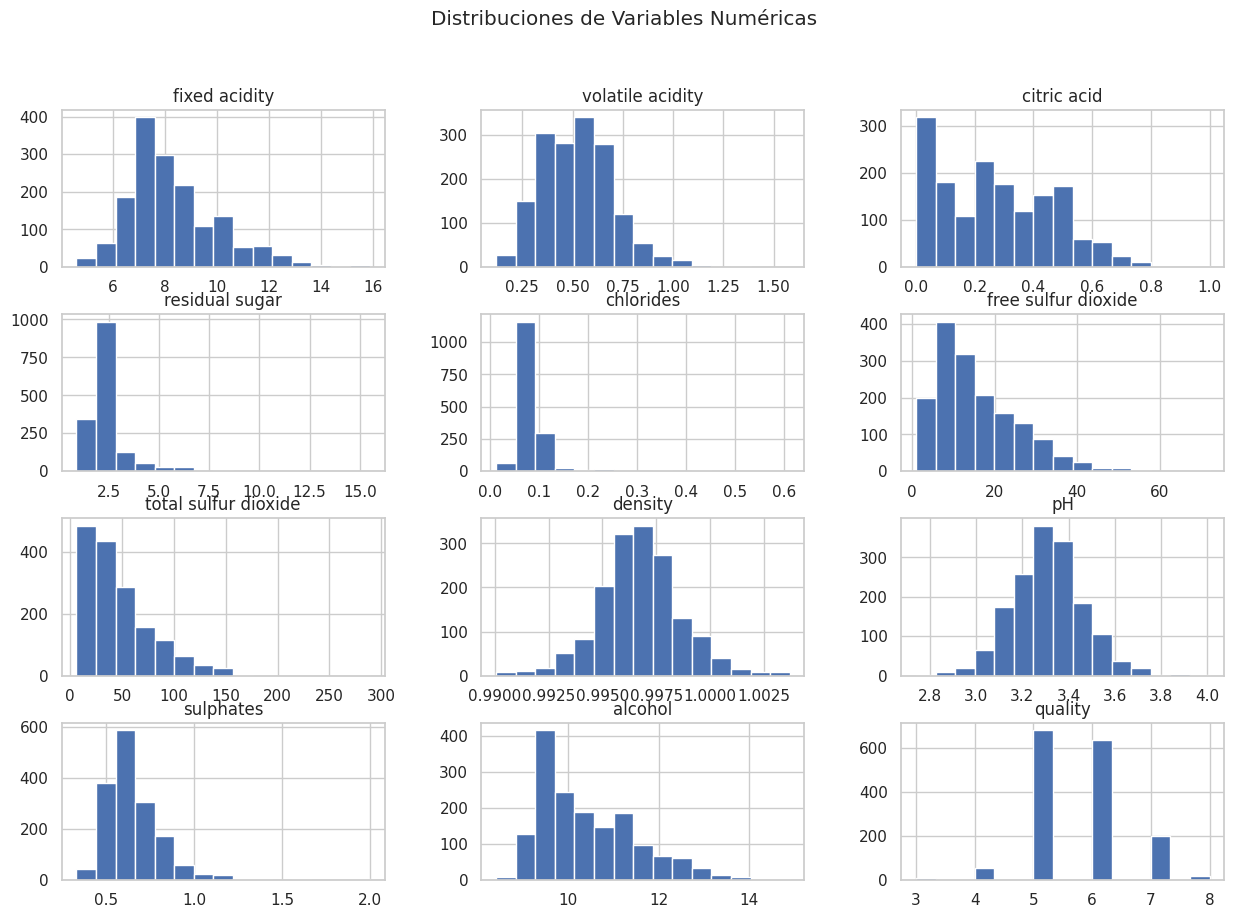

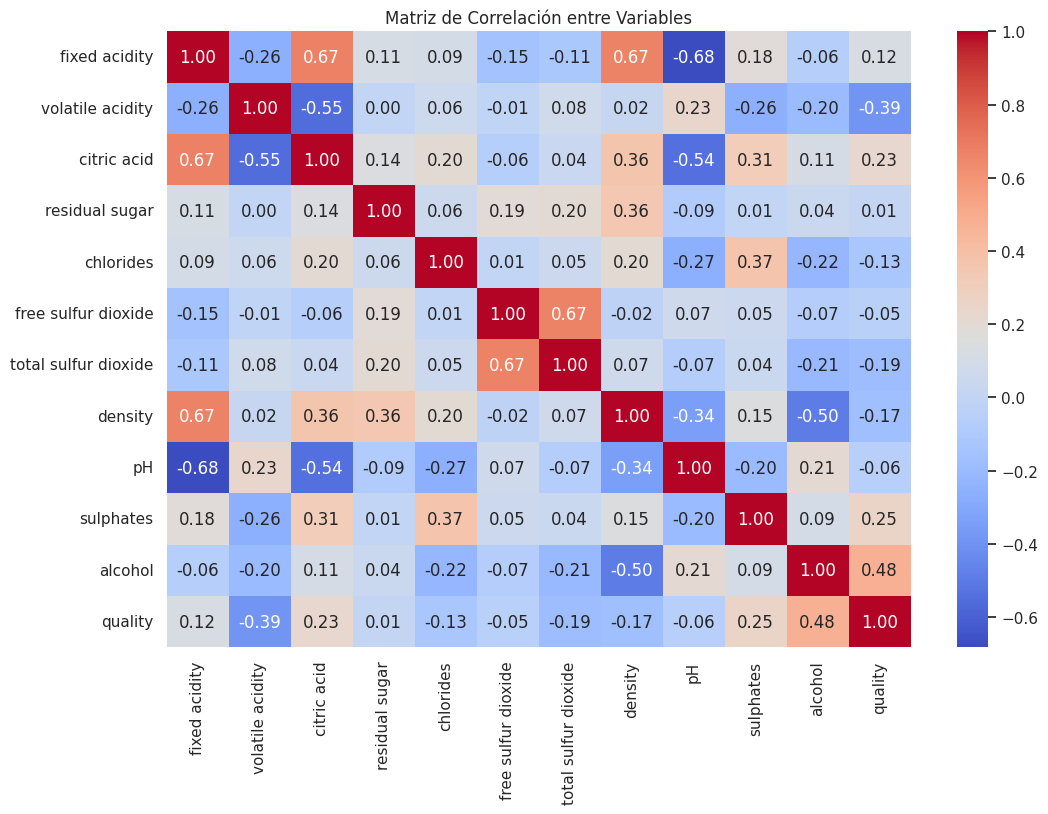

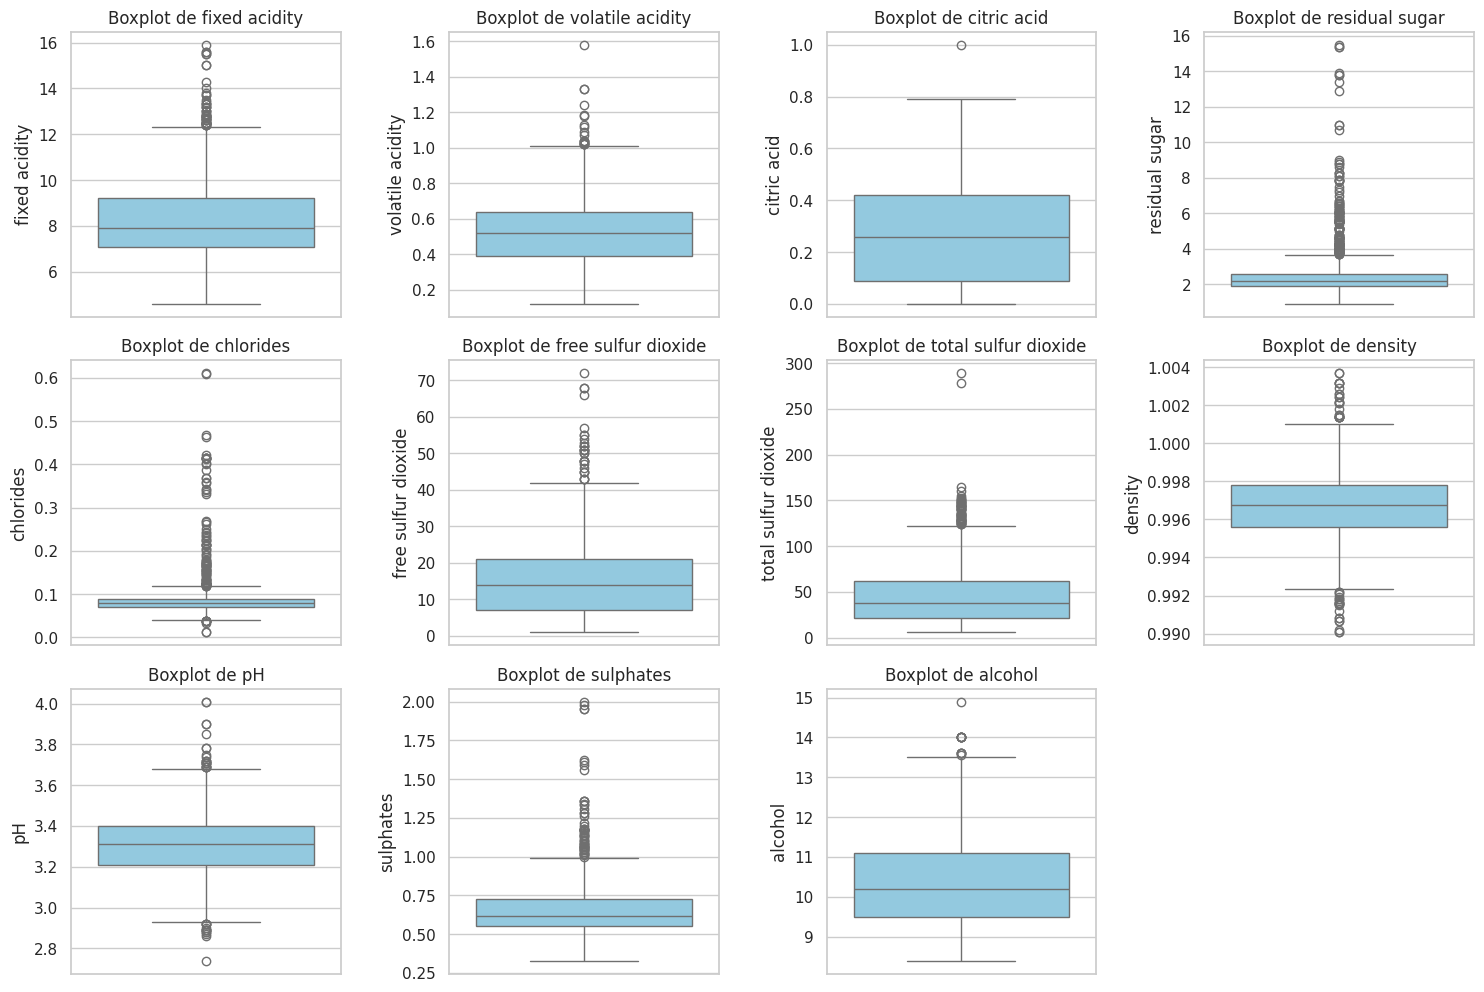

Valores faltantes en cada columna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Tipos de datos en cada columna:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Datos escalados:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

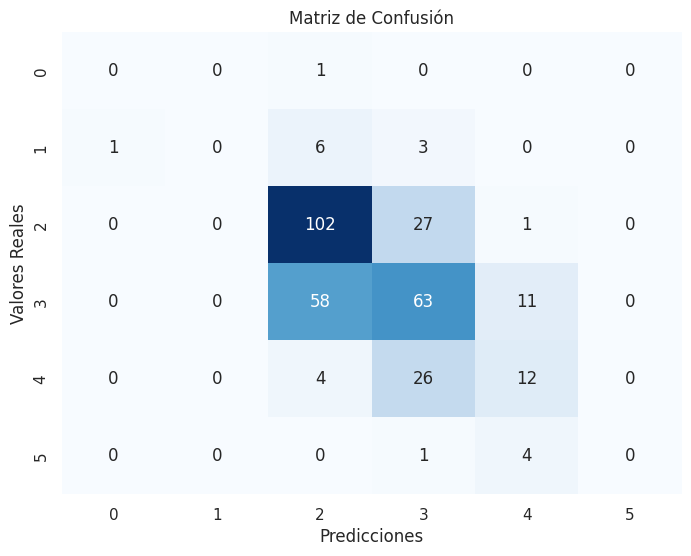

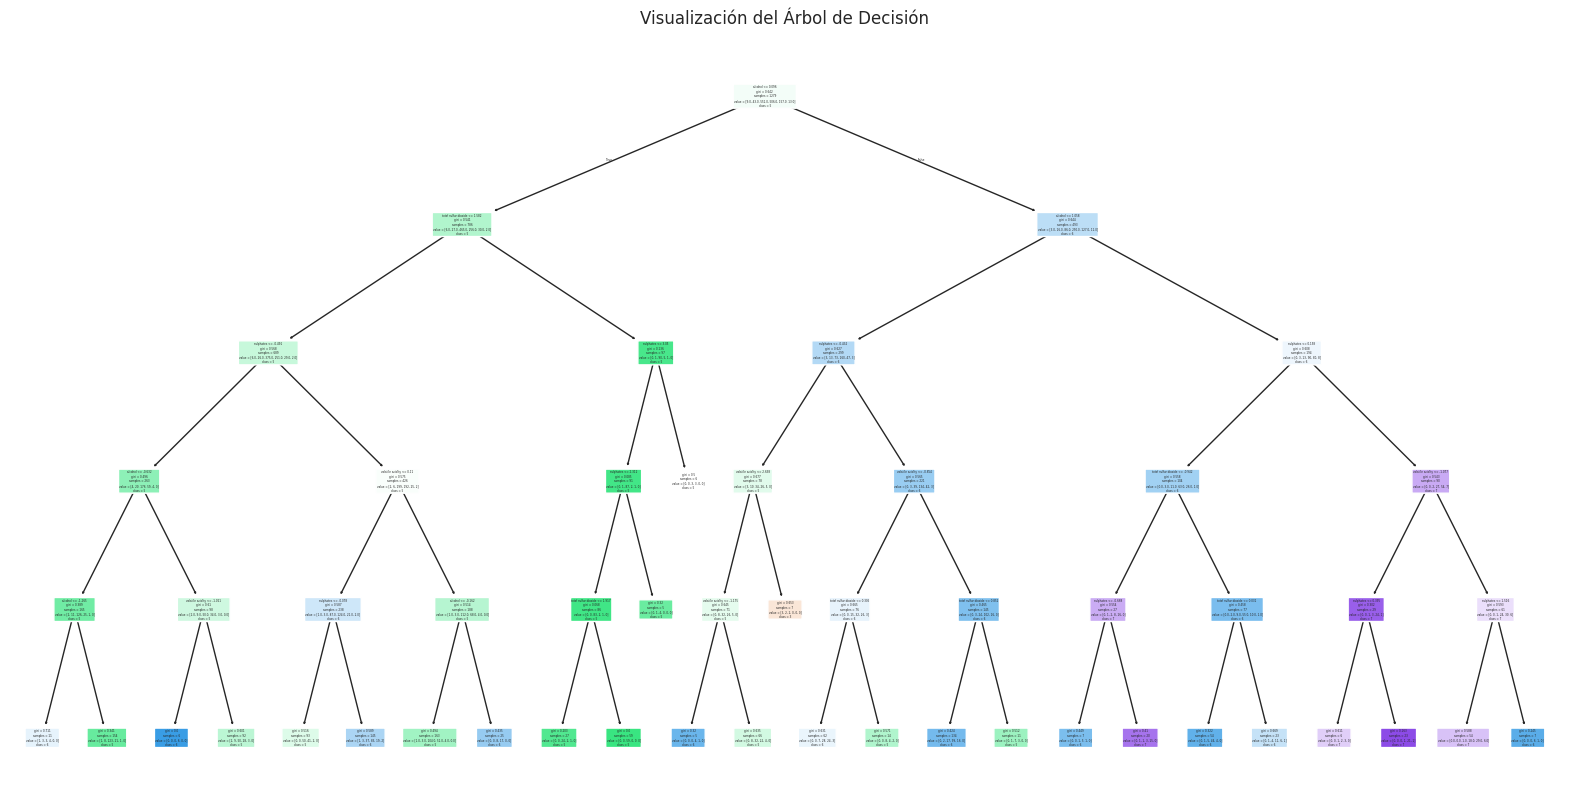

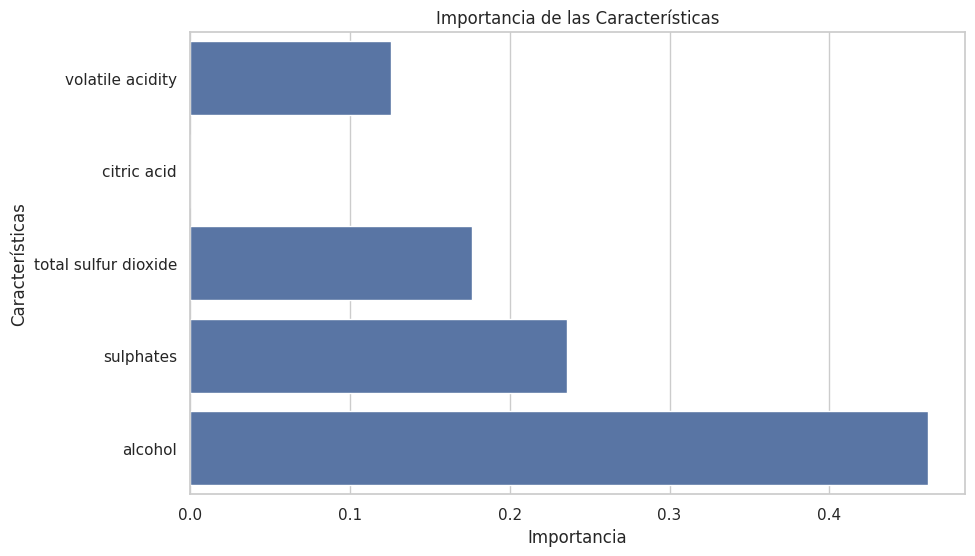

In [40]:
# Paso 1:

# Paso 1.1: Importar bibliotecas necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos:
sns.set(style="whitegrid")


# Paso 1.2: Cargar el dataset en un DataFrame.
df = pd.read_csv('Wine_Quality.csv')

# Verificar las primeras filas para confirmar que los datos se cargaron correctamente.
df.head()

# Paso 1.3: Análisis Exploratorio de los Datos.
# Revisar información general del dataset:
df.info()

# Calcular estadísticas descriptivas del dataset:
df.describe()

# Visualización de la distribución de cada variable numérica:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribuciones de Variables Numéricas')
plt.show()

# Crear y visualizar la matriz de correlación:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Diagrama de caja para detectar valores atípicos:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()
# Excluir la última columna 'calidad'.


# Paso 2:

# Paso 2.1: Comprobar valores faltantes en el dataset.
print("Valores faltantes en cada columna:\n", df.isnull().sum())

# Si se encuentran valores faltantes, rellenarlos con la media de la columna:
df.fillna(df.mean(), inplace=True)

# Paso 2.2: Revisar tipos de datos en cada columna.
print("Tipos de datos en cada columna:\n", df.dtypes)

# Paso 2.3: Normalización o Escalado de Datos.
from sklearn.preprocessing import StandardScaler

# Seleccionar todas las columnas numéricas para escalado:
features = df.columns[:-1]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
# Excluir la columna de calidad si es la última.

print("Datos escalados:\n", df.head())



# Paso 3:

from sklearn.feature_selection import SelectKBest, f_classif

# Paso 3.1: Separar variables predictoras (X) y la variable objetivo (y).
X = df.drop(columns=['quality'])
y = df['quality']
# Excluir la columna 'calidad' que es la variable de salida; # Variable objetivo.

# Paso 3.2: Seleccionar las mejores características.
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
# Se puede ajustar este valor según sea necesario.

# Paso 3.3: Mostrar las características seleccionadas.
selected_features = X.columns[selector.get_support()]
print(f"Características seleccionadas (Top {k}): {selected_features.tolist()}")



# Paso 4:

from sklearn.model_selection import train_test_split

# Paso 4.1: Dividir los datos en conjunto de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Paso 4.2: Confirmar las dimensiones de los conjuntos de datos.
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)



# Paso 5:

from sklearn.tree import DecisionTreeClassifier

# Paso 5.1: Configurar el modelo de árbol de decisión con hiperparámetros iniciales.
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

# Paso 5.2: Entrenar el modelo con el conjunto de entrenamiento.
model.fit(X_train, y_train)

# Paso 5.3: Verificar el rendimiento en el conjunto de entrenamiento.
train_score = model.score(X_train, y_train)
print("Precisión del modelo en el conjunto de entrenamiento:", train_score)



# Paso 6:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Paso 6.1: Realizar predicciones en el conjunto de prueba.
y_pred = model.predict(X_test)

# Paso 6.2: Calcular métricas de rendimiento.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Paso 6.3: Imprimir los resultados.
print("Precisión en el conjunto de prueba:", accuracy)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1-score (weighted):", f1)

# Paso 6.4: Generar e imprimir un reporte de clasificación.
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Paso 6.5: Crear una matriz de confusión para visualizar errores de clasificación.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n", conf_matrix)



# Paso 7:

# Paso 7.1: Matriz de Confusión.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizar la matriz de confusión:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Paso 7.2: Árbol de Decisión.
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=selected_features, class_names=[str(x) for x in set(y)], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

# Paso 7.3: Importancia de las Características.
# Obtener y graficar la importancia de características:
importances = model.feature_importances_
feature_names = selected_features

# Crear un gráfico de barras para las importancias:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


